<a href="https://colab.research.google.com/github/Techsavy3000/-Single-Objective-Minimisation-of-Charge-Consumption/blob/main/A2_Ranjandeep_a1909181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

# **1a** - Loading the Dataset and extracting the feature names and label names for use later on.



In [2]:
# Your code here

import pandas as pd

# Load the data
df = pd.read_csv('/content/assignment2_data_2024.csv')

# Extract feature names and label names
features = df.columns[:-1]
label_name = df.columns[-1]

# Displaying the first few rows of the dataset
print(df.head())


       label         mean radius  mean texture  mean perimeter   mean area  \
0  malignant  15.494653829645529     15.902542      103.008265  776.437239   
1  malignant  16.229870799611437     18.785613      105.176755  874.712003   
2  malignant   16.34567074196476     20.114076      107.083804  872.563251   
3   maligant  13.001009157806651     19.876997       85.889775  541.281012   
4  malignant  16.416060073302194     17.397533      107.857386  891.516818   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0         0.104239          0.168660        0.170572             0.085668   
1         0.091843          0.092548        0.081681             0.053670   
2         0.099924          0.123799        0.128788             0.078310   
3         0.113423          0.173069        0.146214             0.069574   
4         0.097321          0.111530        0.125971             0.068575   

   mean symmetry  ...  radius error  texture error  perimeter error 

# **1b - Text summary of the dataset**

In [3]:
# Display summary statistics of the dataset
summary = df.describe()
print(summary)

# Display information about the dataset
info = df.info()
print(info)

# Count the number of instances of each class
class_counts = df[label_name].value_counts()
print(class_counts)


       mean texture  mean perimeter    mean area  mean smoothness  \
count    220.000000      220.000000   220.000000       220.000000   
mean      18.991963       89.866240   620.956227         0.096480   
std        1.427635        7.366180   106.419871         0.004961   
min       15.349270       74.690886    -2.645499         0.084651   
25%       17.914319       84.911981   558.731832         0.092797   
50%       18.928256       88.587737   603.806128         0.096457   
75%       19.995859       93.066393   655.690435         0.099817   
max       24.430831      121.247839  1103.740620         0.113423   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        220.000000      220.000000           220.000000     220.000000   
mean           0.102879        0.085281             0.046867       0.181850   
std            0.019819        0.026911             0.012548       0.010816   
min            0.075184        0.050771             0.028701  

**Observations:**

There is a negative value in the mean area feature (-2.645499), which seems erroneous.

There are missing values in the symmetry error feature (count of 219 instead of 220).

Typo error in lable (3rd row) - Maligant It should be Malignant

# **1c - Data Visualization and observation**

<ipython-input-5-654814e95ed6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


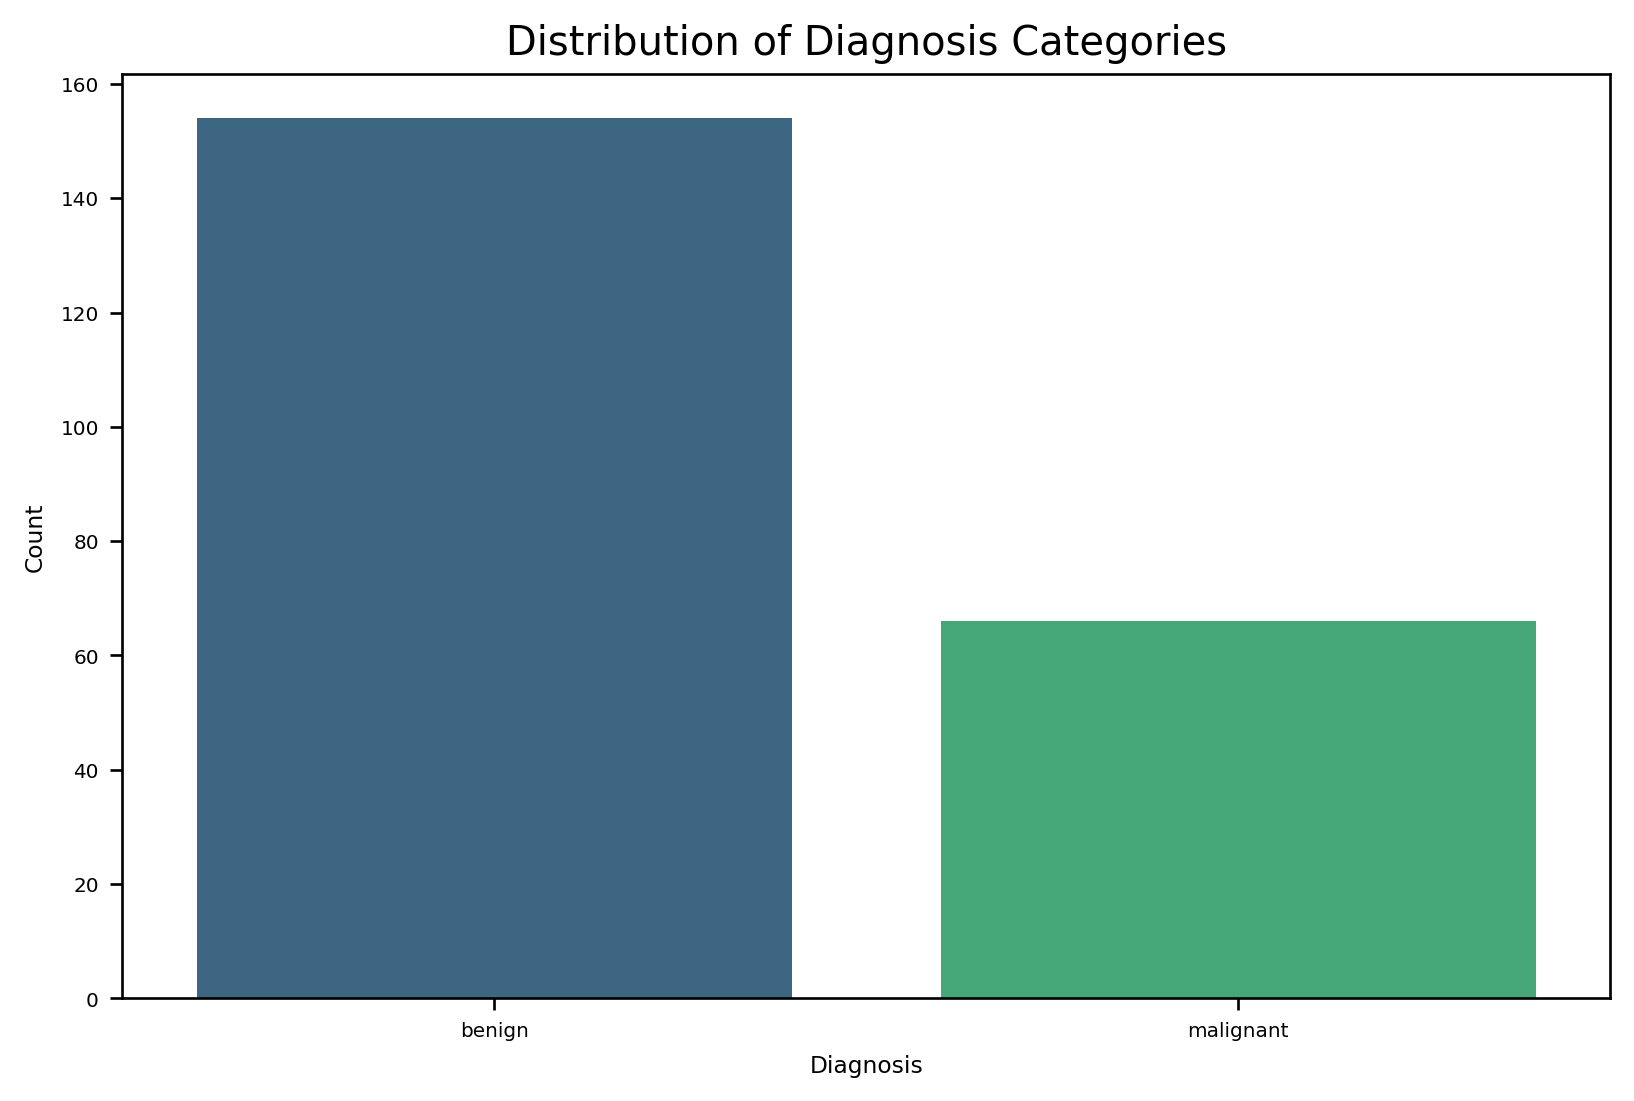

In [5]:
# Correct the spelling mistake in the 'label' column
df['label'] = df['label'].replace('maligant', 'malignant')

# Plotting the 'label' column as a bar chart
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


Visualising for 20 features

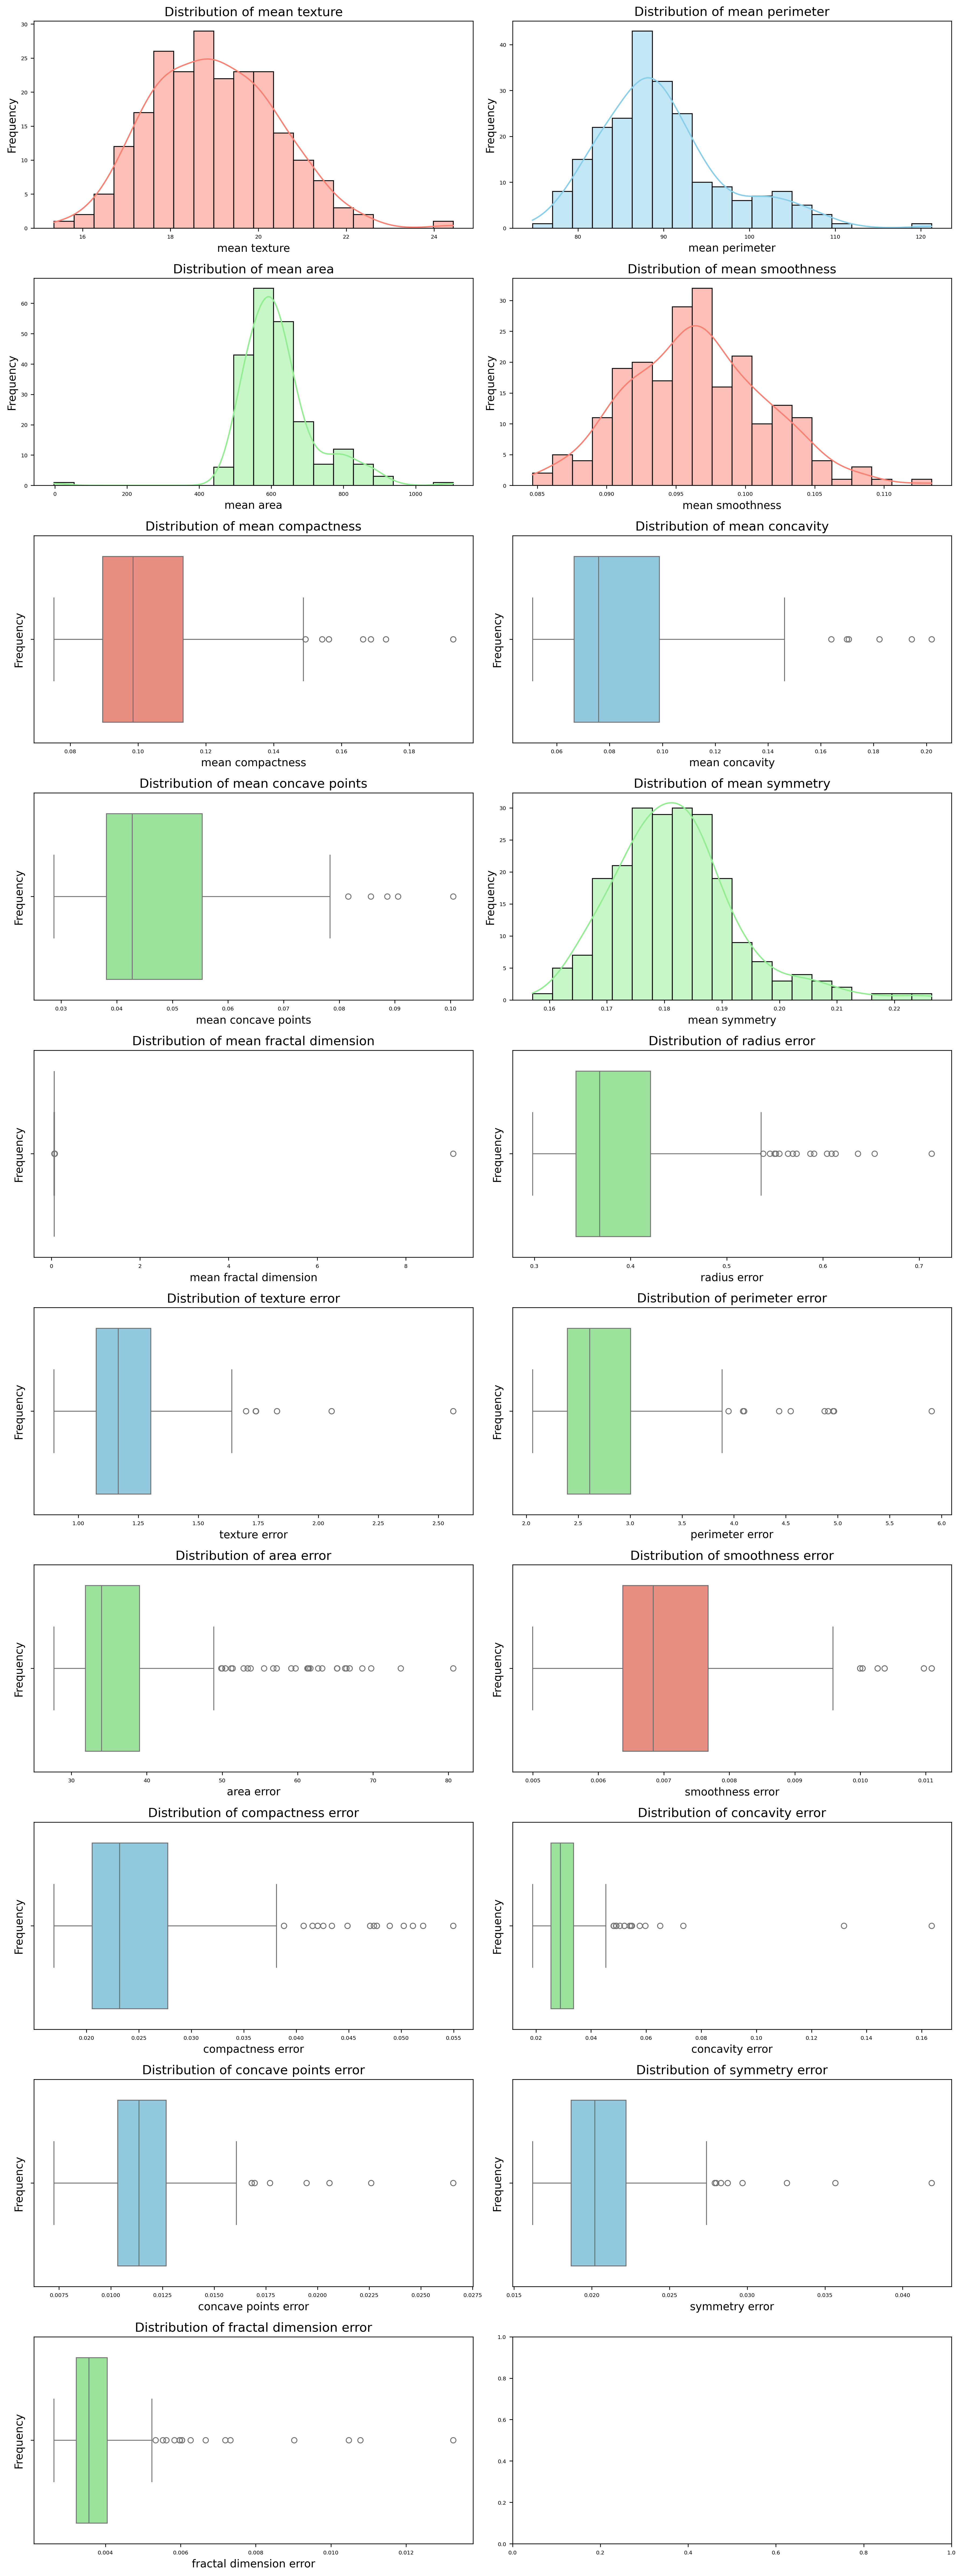

In [6]:
# Creating a grid of plots for each feature in the dataset
num_features = df.select_dtypes(include=[np.number]).columns.tolist()  # numeric features

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 40))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plotting each numeric feature
for i, feature in enumerate(num_features):
    # Deciding plot type based on skewness
    if df[feature].skew() > 1:
        sns.boxplot(x=df[feature], ax=axes[i], color=np.random.choice(['skyblue', 'salmon', 'lightgreen']))
    else:
        sns.histplot(df[feature], kde=True, bins=20, ax=axes[i], color=np.random.choice(['skyblue', 'salmon', 'lightgreen']))

    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(f'{feature}', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


***Observation :***

There is a negative value in the ***mean area feature*** (-2.645499) and in ***mean radius***(-14.292182 ) which seems erroneous.

# **1d - Identifying the missing and erroneous values**

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)


Missing values in each column:
label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64


# 2. Prepare data and models, and make baseline measurements [20%]



*   Split data into appropriate sets using the stratify option to obtain consistent proportions of classes in each set.
*   Decide on appropriate pre-processing steps for the data.
Implement a very simple baseline model that makes purely random predictions of the class.
*   Measure the baseline performance with the following metrics:

*   accuracy
*   balanced accuracy: accounts for imblanaced datasets, defined as (sensitivity + specificity)/2
*   recall
*   precision
*   auc
*   f1score
*   fbeta_scores with beta=0.1
*   fbeta_score with beta=10


*   Also display a confusion matrix for the baseline predictions.
*   As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.



In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/assignment2_data_2024.csv')

# Inspect the first few rows of the dataset
print(data.head())

# Extract feature names and label name
features = data.columns[:-1]
label_name = data.columns[-1]

# Summary of the dataset
print(data.describe())
print(data.info())

# Check the class distribution
print(data[label_name].value_counts())


       label         mean radius  mean texture  mean perimeter   mean area  \
0  malignant  15.494653829645529     15.902542      103.008265  776.437239   
1  malignant  16.229870799611437     18.785613      105.176755  874.712003   
2  malignant   16.34567074196476     20.114076      107.083804  872.563251   
3   maligant  13.001009157806651     19.876997       85.889775  541.281012   
4  malignant  16.416060073302194     17.397533      107.857386  891.516818   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0         0.104239          0.168660        0.170572             0.085668   
1         0.091843          0.092548        0.081681             0.053670   
2         0.099924          0.123799        0.128788             0.078310   
3         0.113423          0.173069        0.146214             0.069574   
4         0.097321          0.111530        0.125971             0.068575   

   mean symmetry  ...  radius error  texture error  perimeter error 

In [10]:
# Check for missing values
print(data.isnull().sum())

# Remove rows with missing or erroneous values
data = data.dropna()

# Confirm no missing values remain
print(data.isnull().sum())


label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64
label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
p

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, fbeta_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load and clean the dataset once again
data = pd.read_csv('/content/assignment2_data_2024.csv')
data['label'] = data['label'].replace(['maligant'], 'malignant')

# Convert numeric columns and correct any malformed strings
for column in data.columns:
    if column != 'label':  # Exclude the label column from conversion
        data[column] = pd.to_numeric(data[column], errors='coerce')

# Fill missing values only in numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Split the data
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Implement and evaluate a random baseline model
np.random.seed(42)
y_pred_random = np.random.choice(['malignant', 'benign'], size=len(y_test), p=[0.5, 0.5])

# Metrics for Random Baseline Model
metrics_random = {
    "accuracy": accuracy_score(y_test, y_pred_random),
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_random),
    "recall": recall_score(y_test, y_pred_random, pos_label='malignant'),
    "precision": precision_score(y_test, y_pred_random, pos_label='malignant'),
    "auc": roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_random)),
    "f1_score": f1_score(y_test, y_pred_random, pos_label='malignant'),
    "f_beta_0.1": fbeta_score(y_test, y_pred_random, beta=0.1, pos_label='malignant'),
    "f_beta_10": fbeta_score(y_test, y_pred_random, beta=10, pos_label='malignant'),
    "confusion_matrix": confusion_matrix(y_test, y_pred_random)
}

# Standardize features and train the SGD Classifier
sgd_pipeline = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
sgd_pipeline.fit(X_train, y_train)
y_pred_sgd = sgd_pipeline.predict(X_test)

# Metrics for SGD Classifier Model
metrics_sgd = {
    "accuracy": accuracy_score(y_test, y_pred_sgd),
    "balanced_accuracy": balanced_accuracy_score(y_test, y_pred_sgd),
    "recall": recall_score(y_test, y_pred_sgd, pos_label='malignant'),
    "precision": precision_score(y_test, y_pred_sgd, pos_label='malignant'),
    "auc": roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_sgd)),
    "f1_score": f1_score(y_test, y_pred_sgd, pos_label='malignant'),
    "f_beta_0.1": fbeta_score(y_test, y_pred_sgd, beta=0.1, pos_label='malignant'),
    "f_beta_10": fbeta_score(y_test, y_pred_sgd, beta=10, pos_label='malignant'),
    "confusion_matrix": confusion_matrix(y_test, y_pred_sgd)
}


# Print confusion matrix
print("Confusion Matrix:\n", metrics_random['confusion_matrix'])
print("Confusion Matrix:\n", metrics_sgd['confusion_matrix'])


# Print metrics for both models
print("Random Baseline Metrics:", metrics_random)
print("SGD Classifier Metrics:", metrics_sgd)




Confusion Matrix:
 [[13 18]
 [ 6  7]]
Confusion Matrix:
 [[31  0]
 [ 2 11]]
Random Baseline Metrics: {'accuracy': 0.45454545454545453, 'balanced_accuracy': 0.4789081885856079, 'recall': 0.5384615384615384, 'precision': 0.28, 'auc': 0.4789081885856079, 'f1_score': 0.3684210526315789, 'f_beta_0.1': 0.28133704735376047, 'f_beta_10': 0.5335849056603773, 'confusion_matrix': array([[13, 18],
       [ 6,  7]])}
SGD Classifier Metrics: {'accuracy': 0.9545454545454546, 'balanced_accuracy': 0.9230769230769231, 'recall': 0.8461538461538461, 'precision': 1.0, 'auc': 0.9230769230769231, 'f1_score': 0.9166666666666666, 'f_beta_0.1': 0.9982030548068285, 'f_beta_10': 0.8474446987032801, 'confusion_matrix': array([[31,  0],
       [ 2, 11]])}


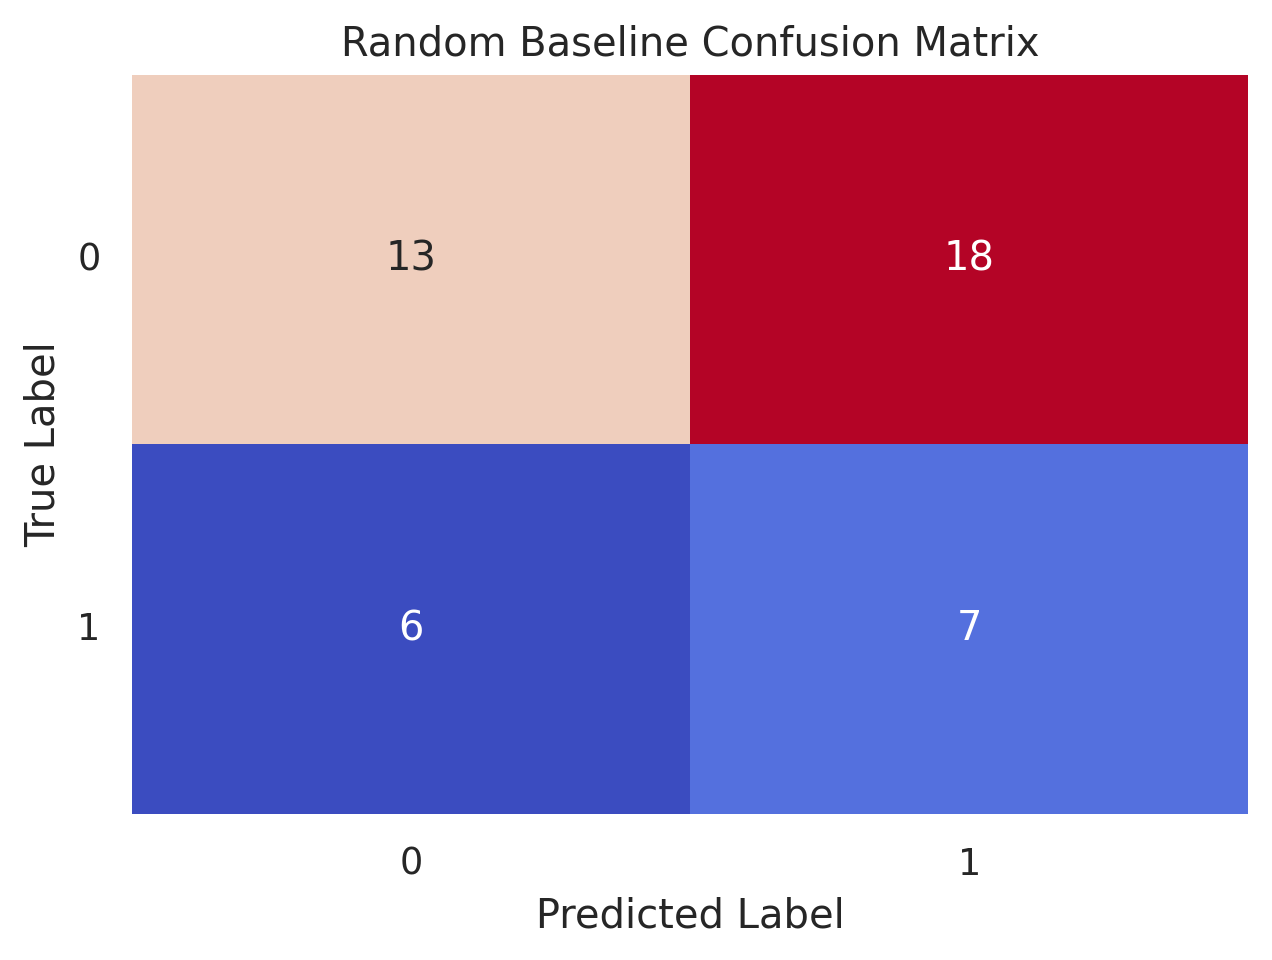

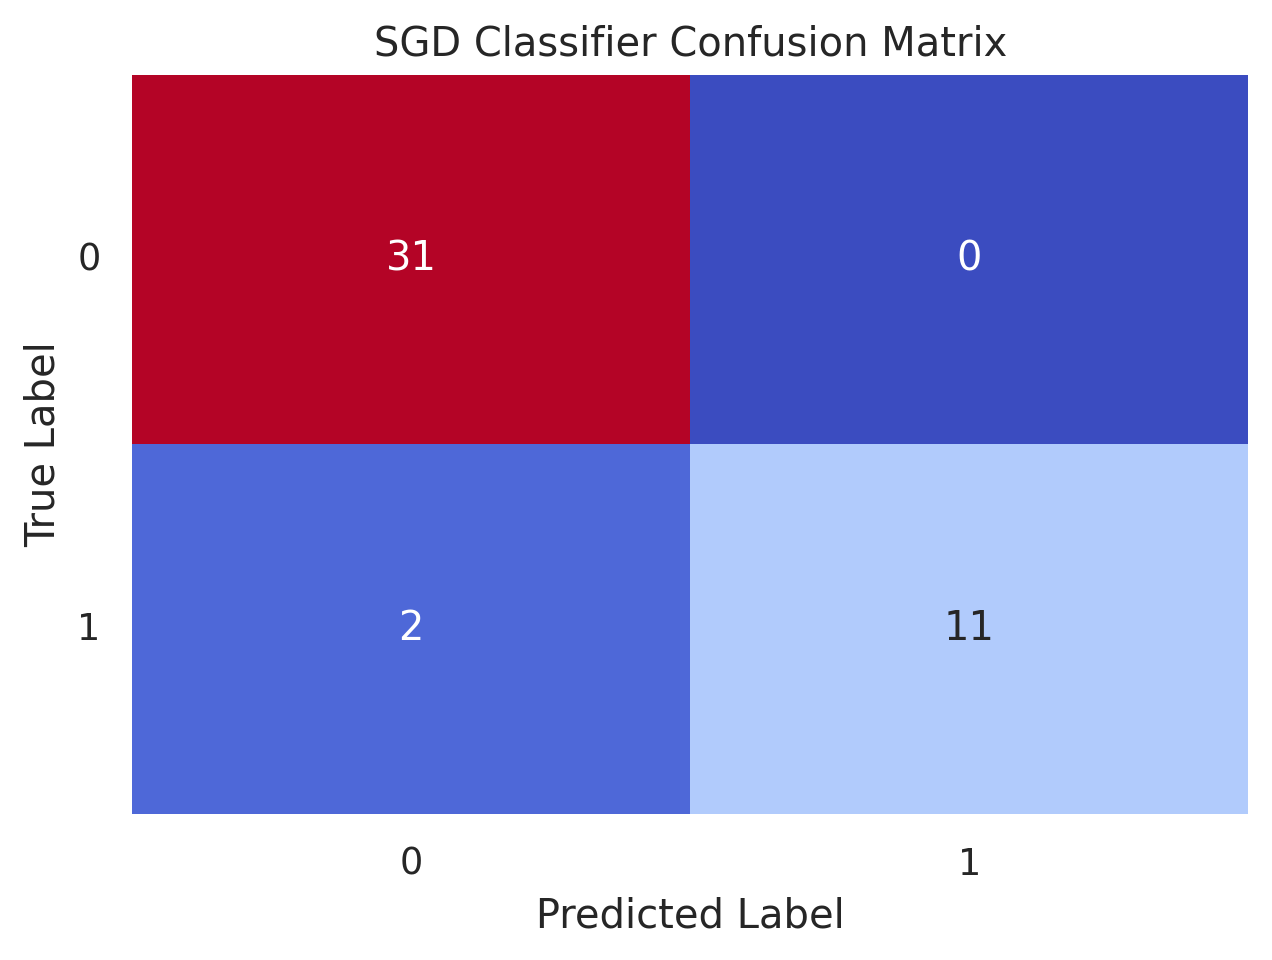

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    # Adjusting the figure size for better readability
    plt.figure(figsize=(6, 4))  # Increased from (3, 2) to (6, 4)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)  # Changed cmap from 'Blues' to 'coolwarm'
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.xticks([0.5, 1.5], ['0', '1'])  # Ensuring tick labels are centered
    plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)  # Ensuring tick labels are centered and not rotated
    plt.show()


# Plot the confusion matrix for the Random Baseline Model
plot_confusion_matrix(metrics_random['confusion_matrix'], title='Random Baseline Confusion Matrix')

# Plot the confusion matrix for the SGD Classifier
plot_confusion_matrix(metrics_sgd['confusion_matrix'], title='SGD Classifier Confusion Matrix')


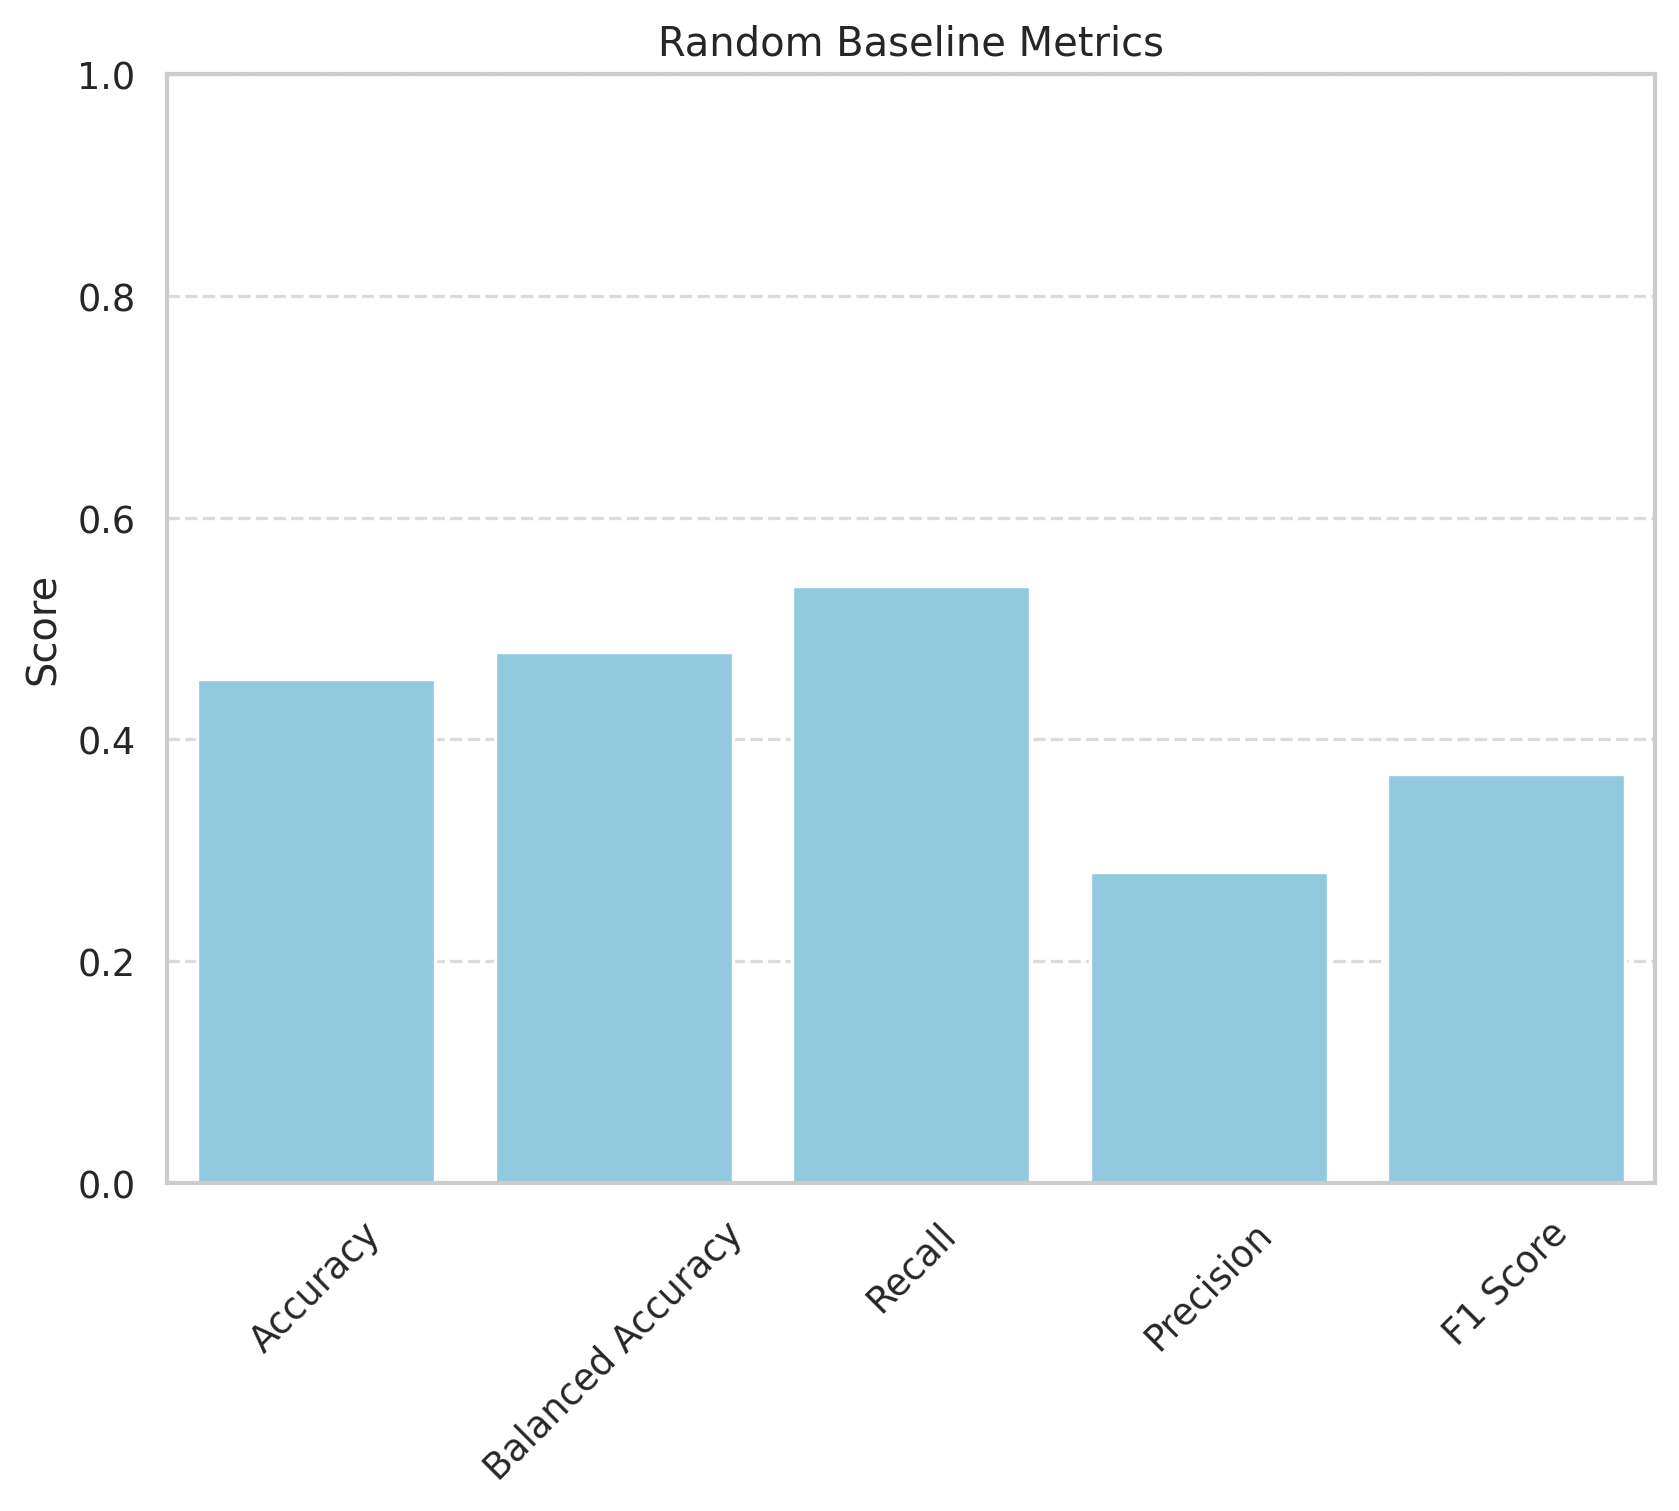

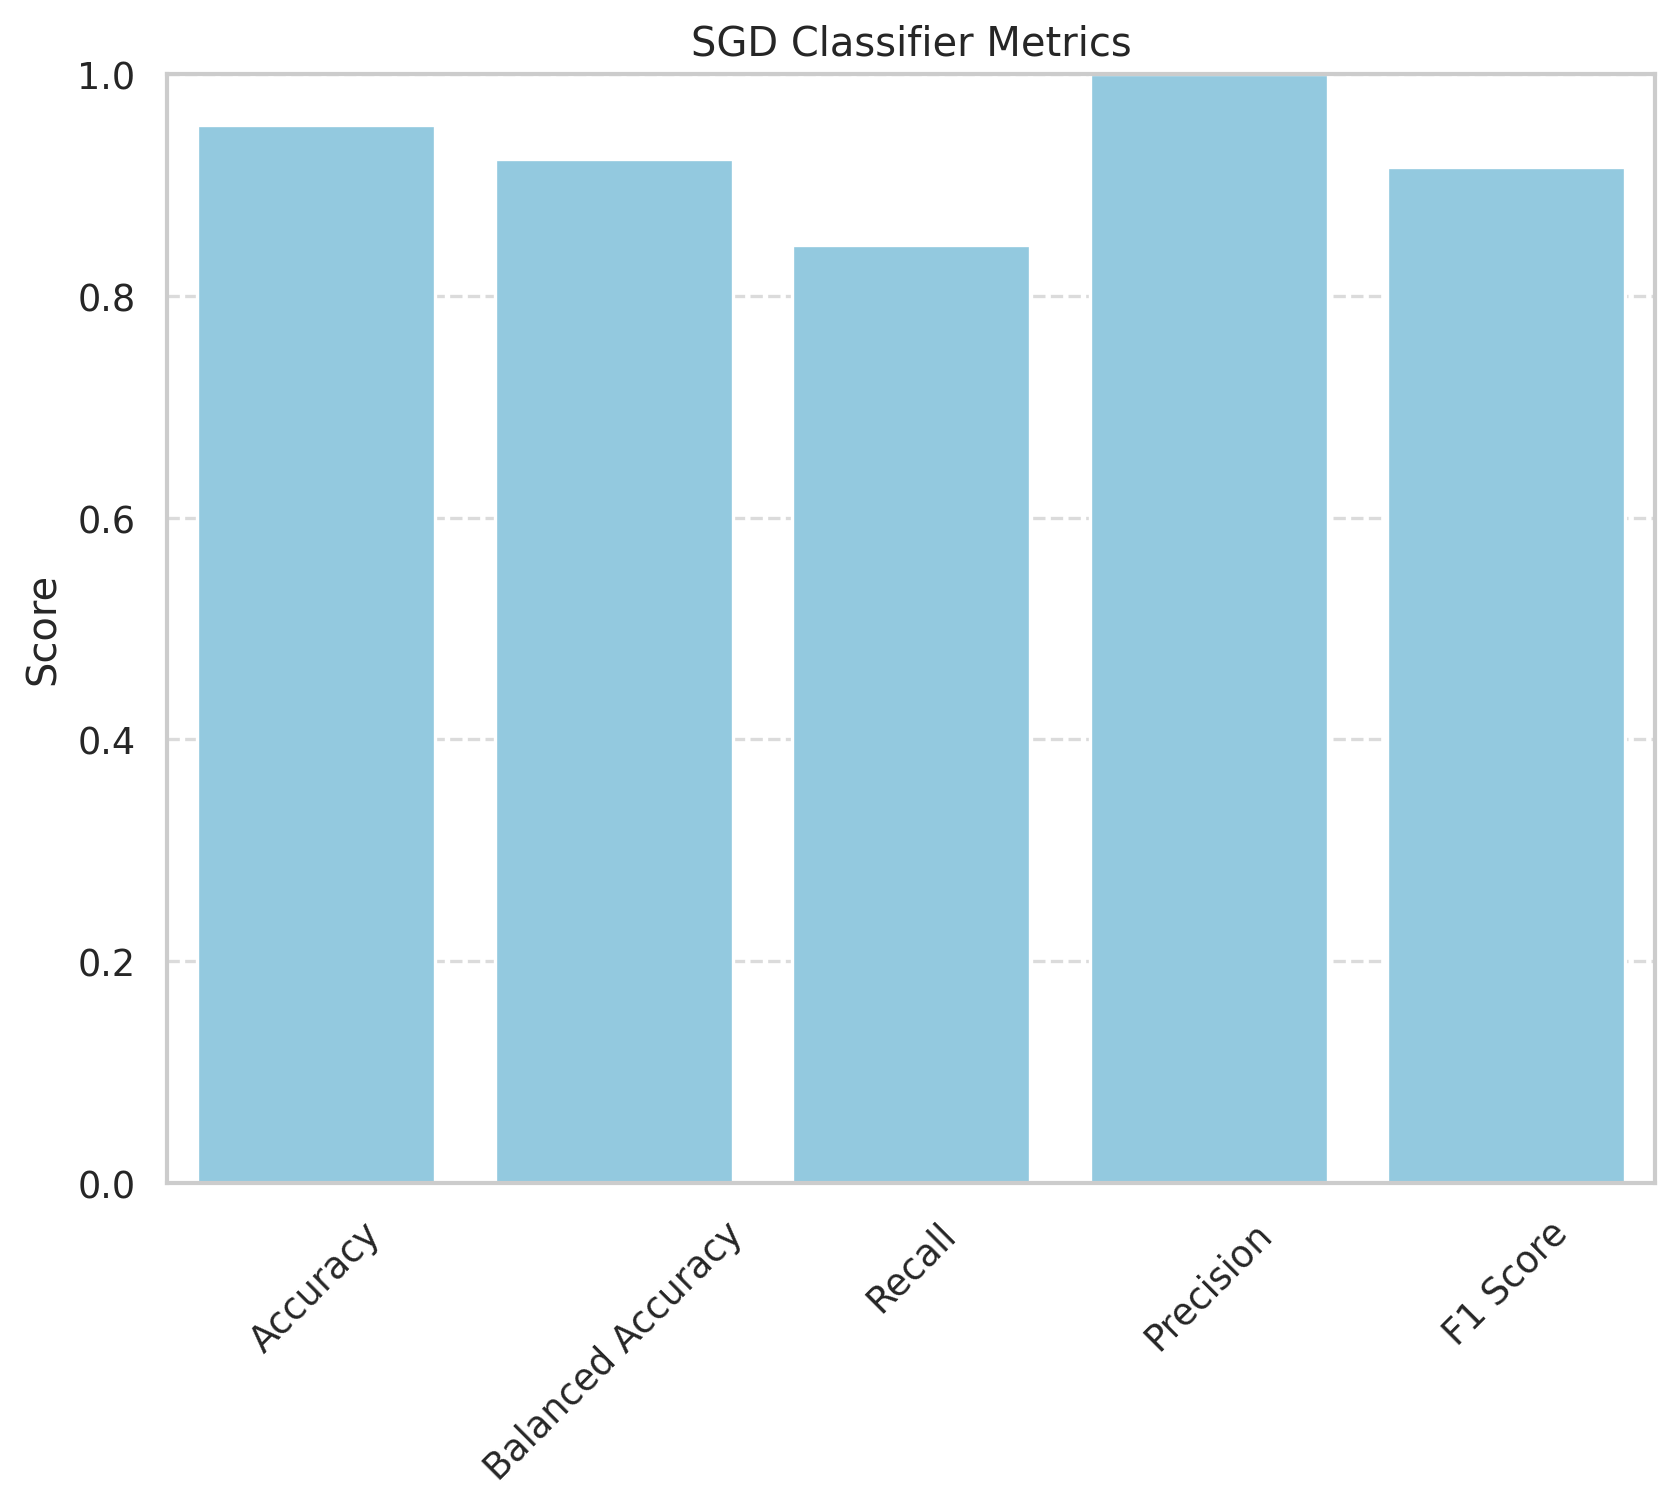

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(metrics, title='Model Metrics'):
    fig, ax = plt.subplots(figsize=(8, 6))  # Increased the figure size for better readability
    metrics_names = ['Accuracy', 'Balanced Accuracy', 'Recall', 'Precision', 'F1 Score']
    scores = [metrics['accuracy'], metrics['balanced_accuracy'], metrics['recall'], metrics['precision'], metrics['f1_score']]

    # Using a uniform color palette and adding grid lines for clarity
    sns.barplot(x=metrics_names, y=scores, color='skyblue')  # Changed from palette='Blues_d' to a single color
    plt.title(title)
    plt.ylabel('Score')
    plt.ylim(0, 1)  # Ensuring y-axis always starts from 0 to 1 for consistency
    plt.xticks(rotation=45)  # Keep the labels rotated for better visibility
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.show()


# Plot metrics for Random Baseline Model
plot_metrics(metrics_random, title='Random Baseline Metrics')

# Plot metrics for SGD Classifier
plot_metrics(metrics_sgd, title='SGD Classifier Metrics')


## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [ ]:
# I chose the F1 Score as my performance metric because it effectively balances precision and recall, which is especially valuable in dealing with imbalanced datasets.
# This metric provides a comprehensive measure of model performance by simultaneously considering both false positives and false negatives, which are critical in many practical applications.


### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define models
sgd = SGDClassifier(random_state=42)
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define parameter grids
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'loss': ['hinge', 'log'],  # loss functions
    'penalty': ['l2', 'l1', 'elasticnet']
}

param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['rbf', 'linear'],  # Type of SVM kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30]  # Maximum number of levels in tree
}

# Set up grid search with cross-validation
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, scoring='f1')
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1')
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')


# ***FItting the Models***

In [15]:
grid_sgd.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)


Streaming output truncated to the last 5000 lines.
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1382, in _check

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

Best parameters for SGD Classifier: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
Best cross-validated F1 score for SGD Classifier: nan


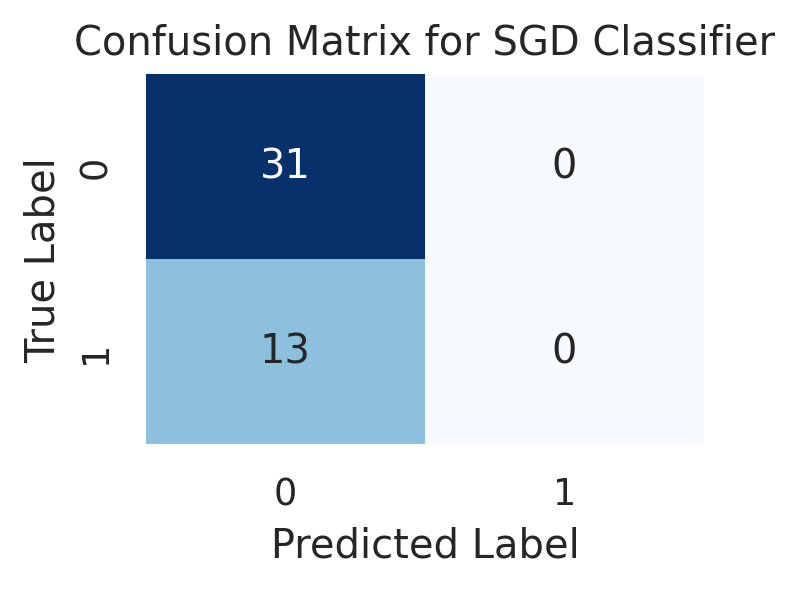

Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated F1 score for SVM: nan


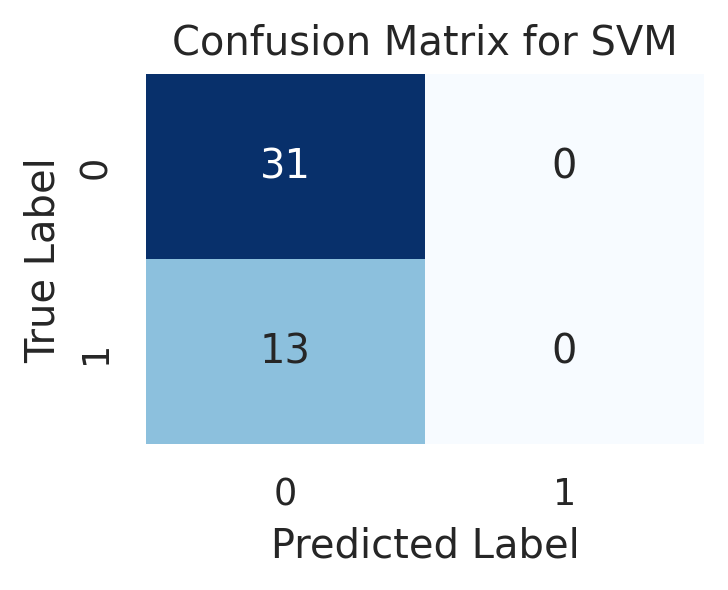

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best cross-validated F1 score for Random Forest: nan


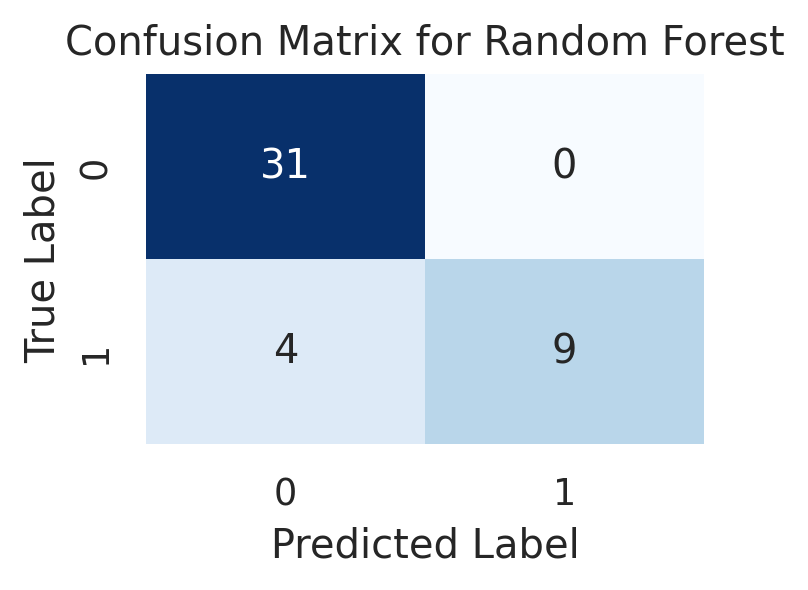

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(grid, model_name):
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best cross-validated F1 score for {model_name}: {grid.best_score_:.3f}")

    # Predict using the best model
    y_pred = grid.predict(X_test)

    # Compute and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Evaluate all models
evaluate_model(grid_sgd, "SGD Classifier")
evaluate_model(grid_svm, "SVM")
evaluate_model(grid_rf, "Random Forest")


The best model based on cross-validated F1 score is RandomForestClassifier
Best parameters for RandomForestClassifier: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best cross-validated F1 score for RandomForestClassifier: nan


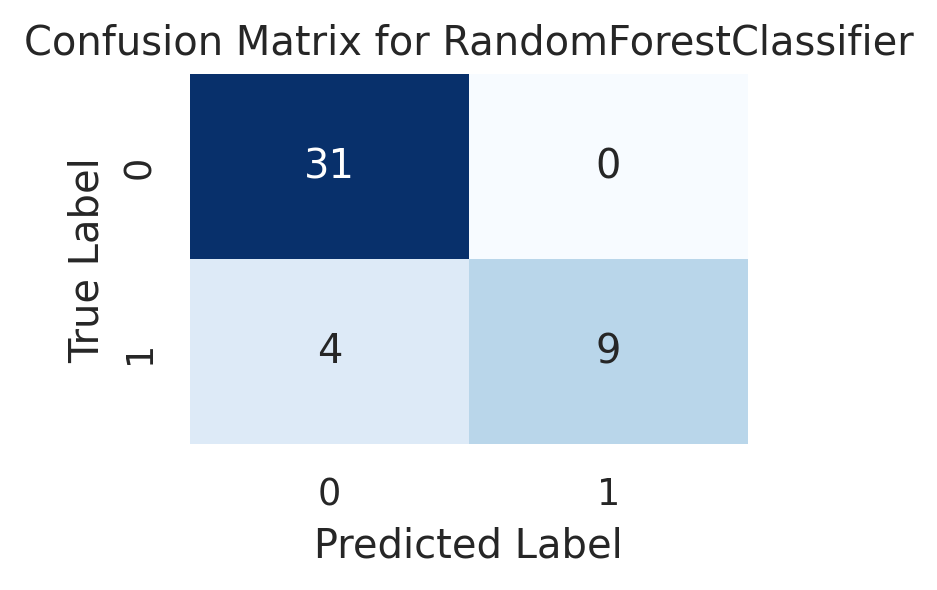

In [17]:
# Choosing the best modle
best_model = grid_svm if grid_svm.best_score_ > max(grid_sgd.best_score_, grid_rf.best_score_) else (grid_sgd if grid_sgd.best_score_ > grid_rf.best_score_ else grid_rf)

# Display final results
print(f"The best model based on cross-validated F1 score is {best_model.estimator.__class__.__name__}")
evaluate_model(best_model, best_model.estimator.__class__.__name__)


### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

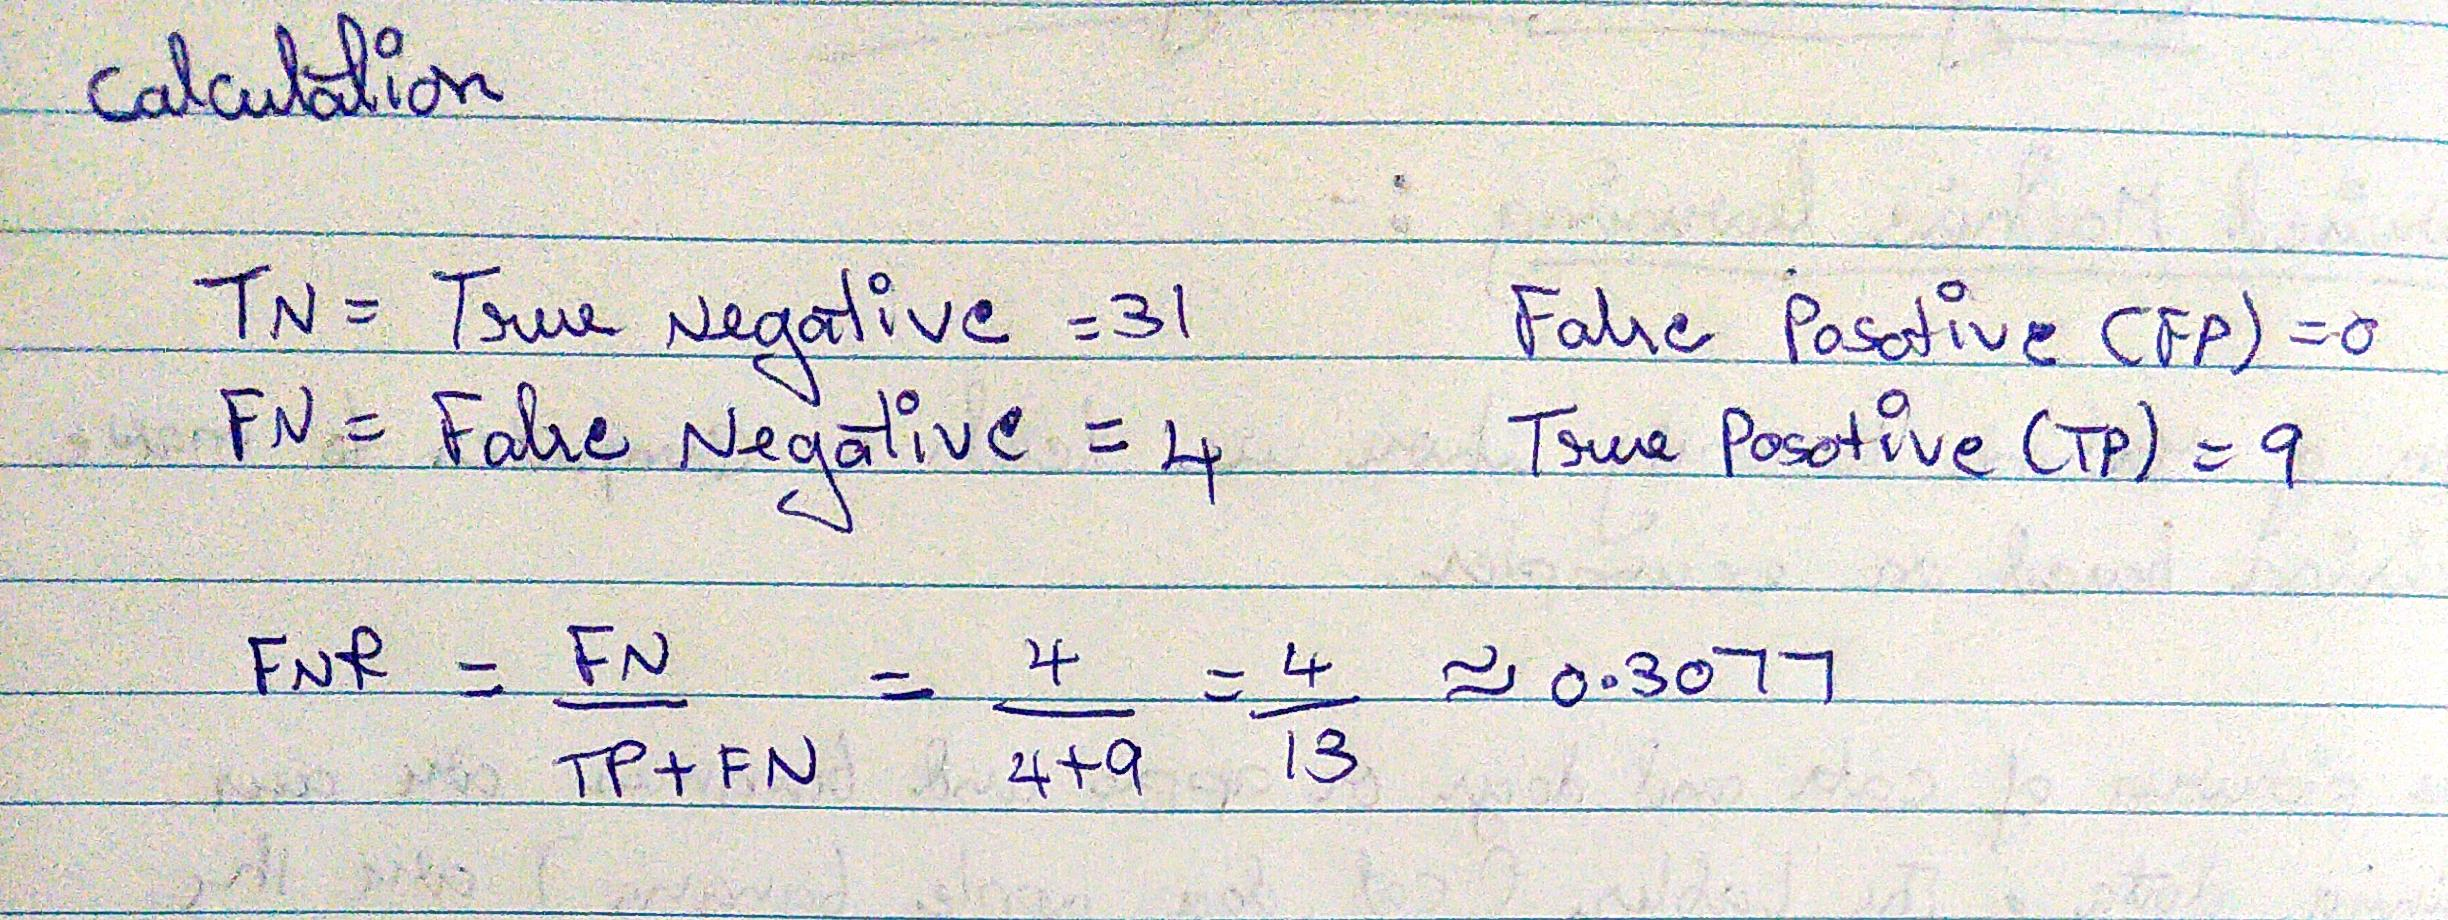

This means there's approximately a 30.77% chance that a sample from a person with a malignant tumor is incorrectly classified as not having cancer. This metric is extremely important in medical contexts because it directly relates to the risk of failing to treat a patient who actually has cancer.

## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [18]:
# Your code here

import pandas as pd

# Assuming data is loaded and class1_data and class2_data are defined
class1_data = data[data['label'] == 'benign']
class2_data = data[data['label'] == 'malignant']

# Calculate T-score for each feature
t_scores = {}
features = data.columns.drop('label')  # exclude the label column

for feature in features:
    mean_x1 = class1_data[feature].mean()
    mean_x2 = class2_data[feature].mean()
    stddev_x1 = class1_data[feature].std()
    stddev_x2 = class2_data[feature].std()

    t_score = (mean_x2 - mean_x1) / (0.5 * (stddev_x2 + stddev_x1))
    t_scores[feature] = t_score

# Sort features by the absolute value of their T-scores
sorted_features = sorted(t_scores.items(), key=lambda x: abs(x[1]), reverse=True)

# Display the top 4 discriminative features
top_4_features = sorted_features[:4]
for feature, score in top_4_features:
    print(f"Feature: {feature}, T-score: {score}")


Feature: mean concave points, T-score: 2.338207079841026
Feature: mean perimeter, T-score: 1.9282081753778928
Feature: area error, T-score: 1.7372155133410985
Feature: mean concavity, T-score: 1.6835370935180431


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

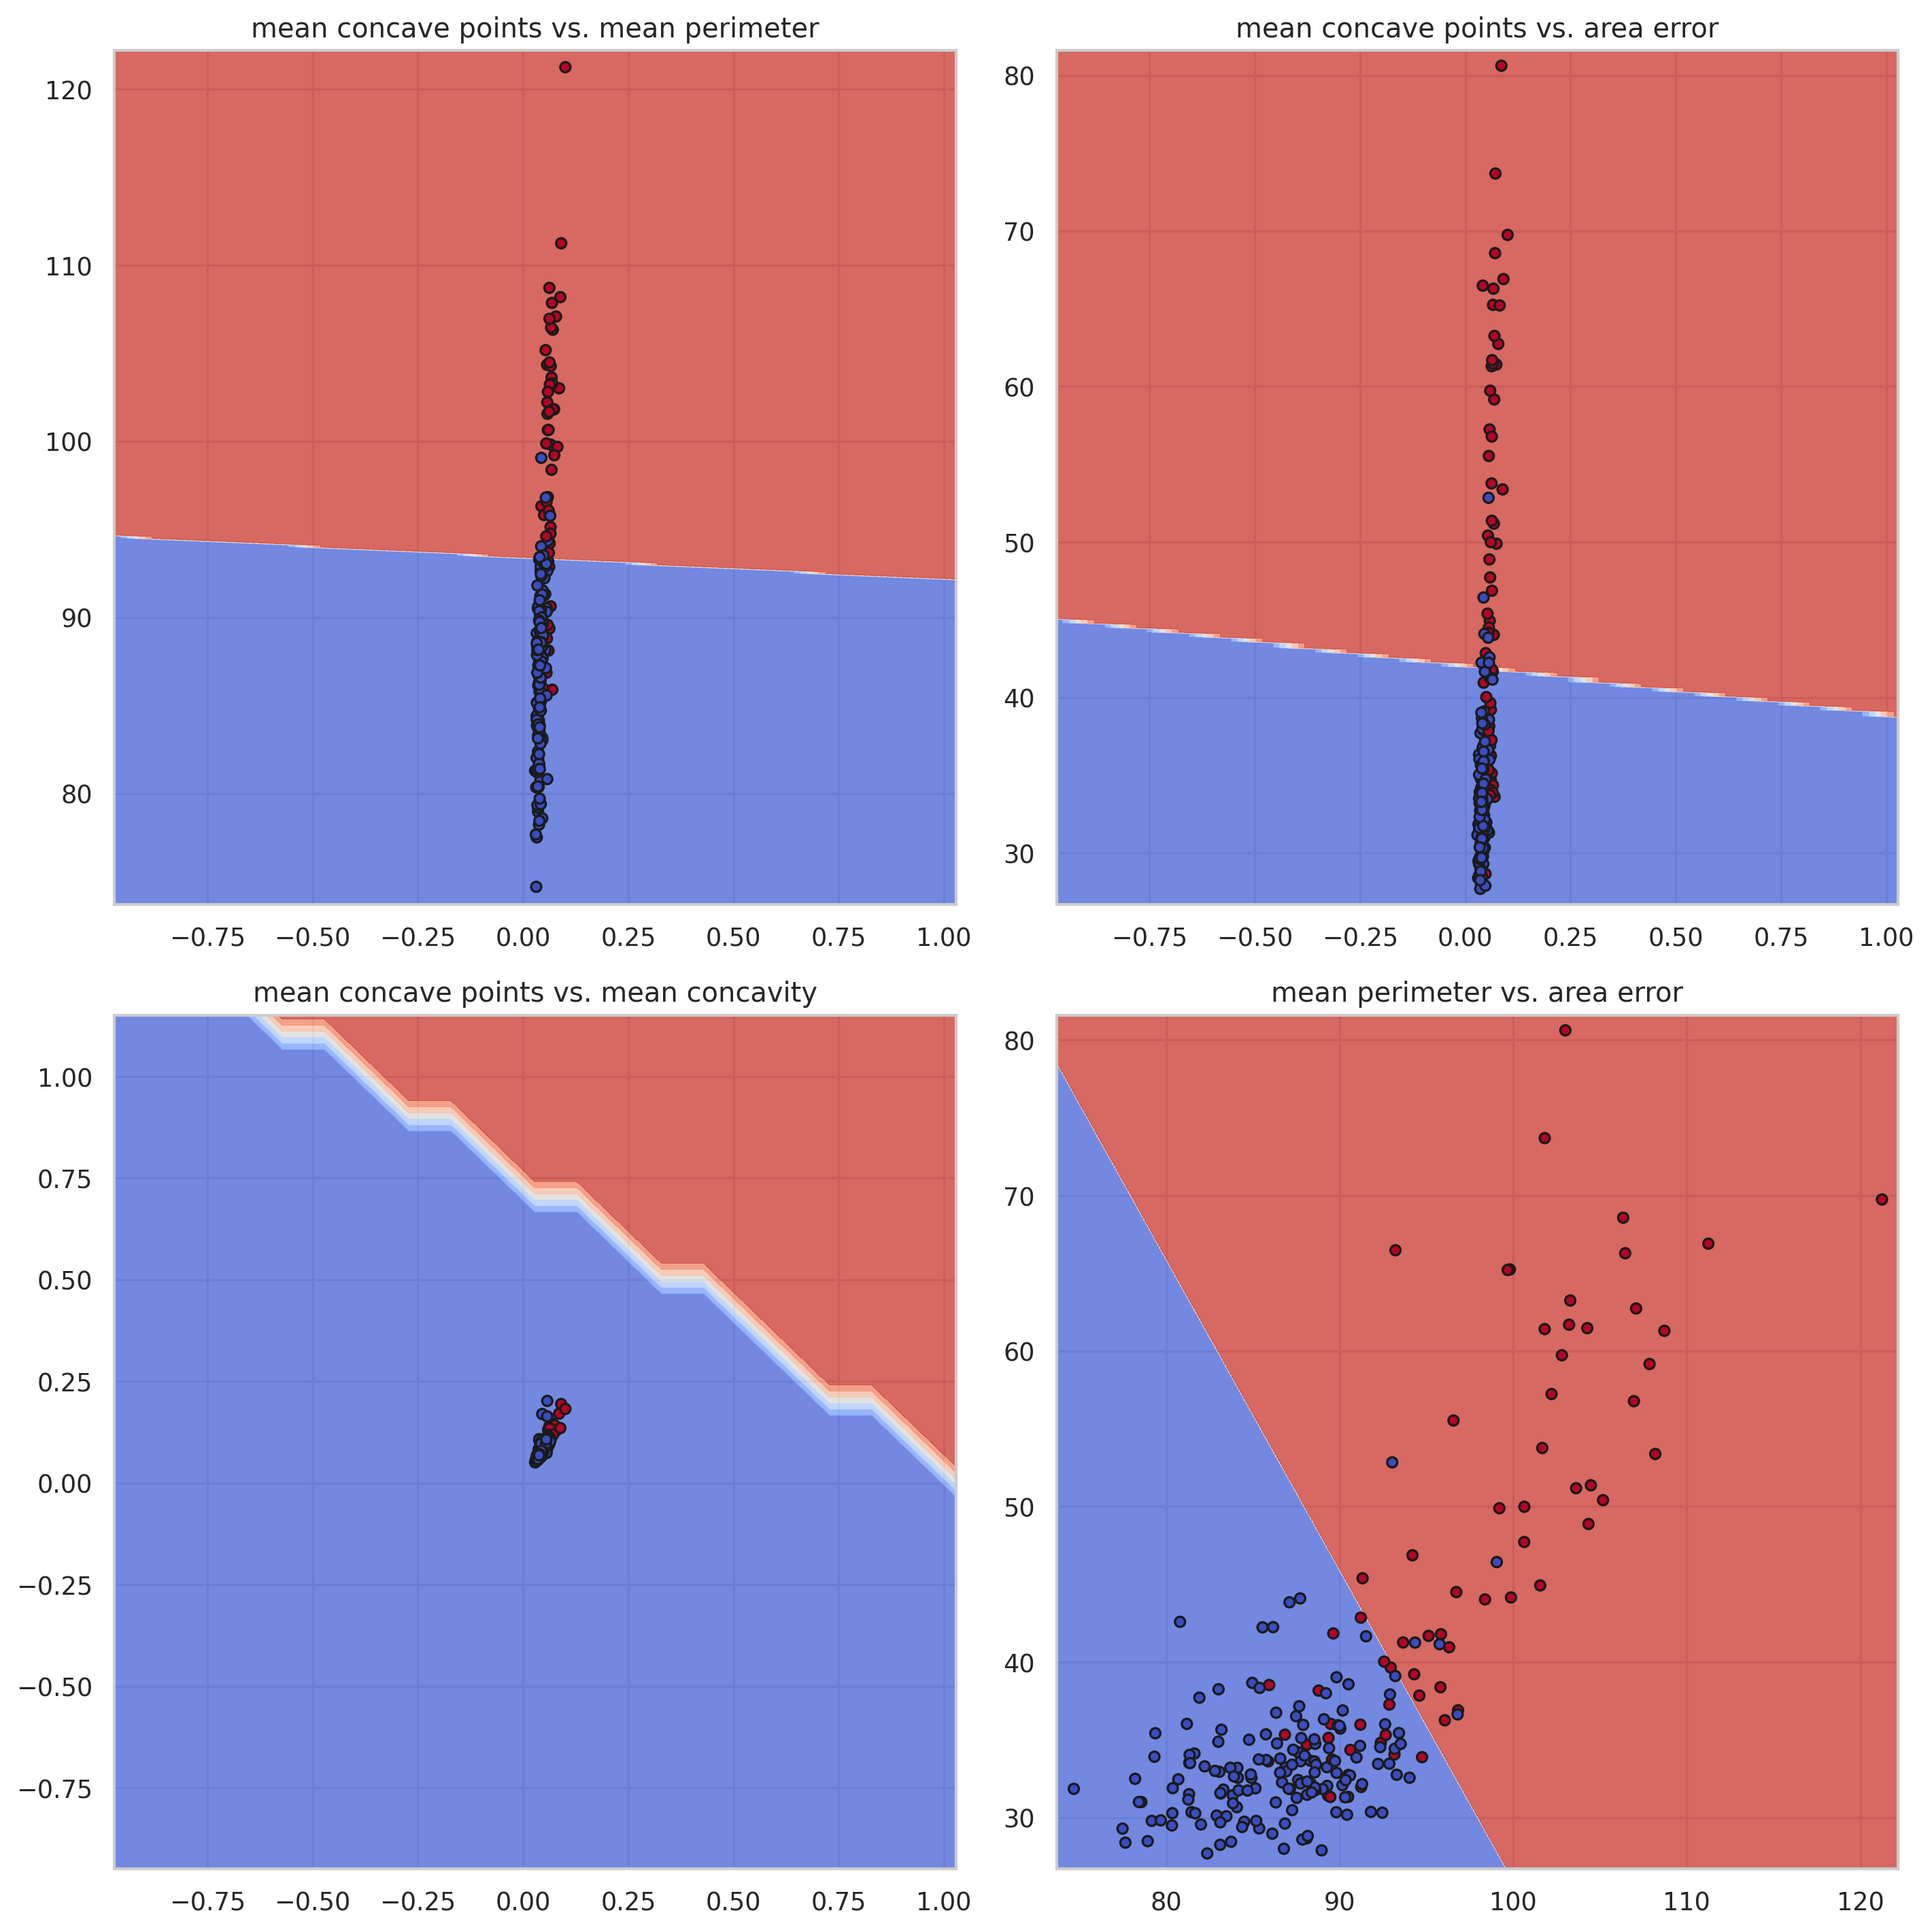

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Function to plot decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Select data for the top 4 features
feature_pairs = [
    ('mean concave points', 'mean perimeter'),
    ('mean concave points', 'area error'),
    ('mean concave points', 'mean concavity'),
    ('mean perimeter', 'area error')
]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, (feature1, feature2) in enumerate(feature_pairs):
    # Prepare data
    X = data[[feature1, feature2]].values
    y = data['label'].map({'benign': 0, 'malignant': 1}).values

    # SVM Classifier
    model = SVC(kernel='linear')
    model.fit(X, y)

    # Set up plot grid
    ax = axes[i // 2, i % 2]
    ax.set_title(f'{feature1} vs. {feature2}')

    # Plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    plot_contours(ax, model, xx, yy, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.tight_layout()
plt.show()


### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

Based on the results I've reviewed, my model correctly identifies cancer about 69.23% of the time. While this doesn't yet meet the client's goal of 90%, it shows a solid foundation for further improvement. Also, the model does exceed the client's threshold for false positives, identifying benign cases as malignant more often than desired.